# Differential (Predictive) Coding

## Motivation

* Usually happens that the differences between consecutive PCM (Pulse-Code Modulation) [[A.V. Oppenheim, 1999](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=oppenheim+discrete+time+signal+processing&btnG=&oq=Oppenheim)] samples

  $$
    e[n] = s[n] - s[n-1],
  $$

  tend to have a smaller variance (and therefore, smaller entropy) than the original ($s$) ones

  $$
    \sigma^2(e) \leq \sigma^2(s),
  $$

  which potentially provides better lossless compression ratios for $e$ than for $s$.

* Finally, notice that by definition, if a source of "noise" (such as the quantization noise) has not been introduced during the encoding process, differential encoding is a fully reversible process:

  $$
    s[n] = e[n] + s[n-1].
  $$

# Lab

* Compute $e$ signal for the [Jfk_berlin_address_high.ogg](https://upload.wikimedia.org/wikipedia/commons/3/3a/Jfk_berlin_address_high.ogg) $s$ signal and plot the probability density function (also known as the histogram) of $e$. Note: use Python and Matplotlib, and insert the code here.

<IPython.core.display.Math object>

[   0    0    0 ..., 5632 5295 4750]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

[   0    0    0 ..., -117 -337 -545]


<IPython.core.display.Math object>

Variance s 16284125.0537
Variance e 249304.528952


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Recompute signal [   0    0    0 ..., 5632 5295 4750]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

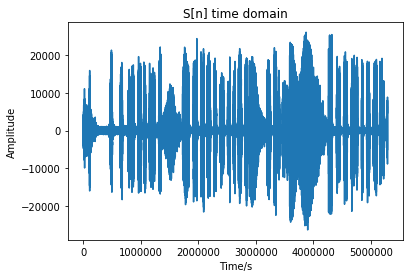

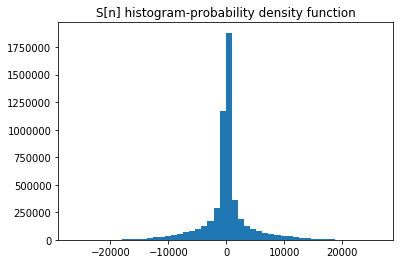

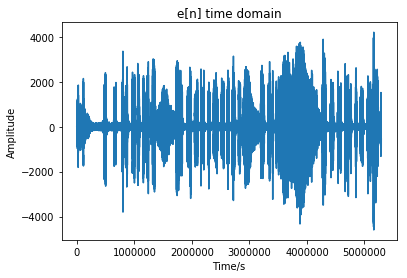

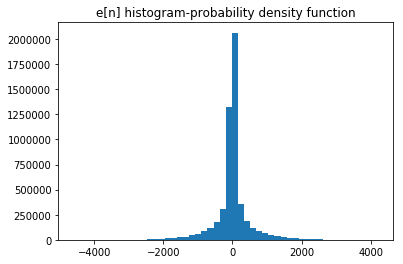

In [1]:
import matplotlib.pyplot as plt
import pylab as P
from scipy.io import wavfile as wav
import numpy as np
from IPython.display import Math

#Read wave
rate, data = wav.read('audio/Jfk_berlin_address_high.wav')
#Keep only 2 min because wave is too long
signal = data[0:int(120*rate)]
#This wave have 2 channels so in this example only use one
soloC = signal[:,0]
#Compute e_signal
e_signal = np.append(soloC[0], soloC[1:] - soloC[:-1])
#Recompute original
recompute = np.append(e_signal[0], e_signal[1:] + soloC[:-1])
#Variance
varSignal = np.var(soloC)
varE = np.var(e_signal)
#Check origianl signal with recompute signal 
c = np.all(np.array(soloC) == np.array(recompute))
            
#Output
display(Math(r'\text{Original signal}~s[n]'))
print(soloC)
display(Math(r'\text{For compute the e signal we use the following definition:}~e[n]=s[n]-s[n-1]'))
display(Math(r'\text{And we get this:}~e[n]'))
print(e_signal)
display(Math(r'\text{Now we check the variance:}~\sigma^2(e)\leq\sigma^2(s)'))
print('Variance s',varSignal)
print('Variance e',varE)
if (varE <= varSignal ): display(Math(r'\text{Variance of the signal}~e~\text{is less than the variance of signal}~s'))
display(Math(r'\text{We can recompute the original signal use this definition:}~s[n]=e[n]+s[n-1]'))
display(Math(r'\text{Result:}~s[n]'))
print('Recompute signal', recompute)
display(Math(r'\text{We can verify the original signal and the recompute signal are equal}'))
if (c == True) : display(Math(r'\text{Recompute signal is equal to original}'))

display(Math(r'\text{Graphics}'))    
%matplotlib inline
plt.figure()
plt.plot(soloC)
plt.title('S[n] time domain')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.figure()
plt.hist(soloC,50)
plt.title('S[n] histogram-probability density function')
plt.figure()
plt.plot(e_signal)
plt.title('e[n] time domain')
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.figure()
plt.hist(e_signal,50)
plt.title('e[n] histogram-probability density function')
plt.show()

## DPCM (Differential PCM) [[Cutler, 1952]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=%22Differential+quantization+of+communication+signals%22&btnG=)

* Signals sampled at Nyquist rate exhibit correlation between consecutive samples. Therefore, the variance of the first difference

  \begin{equation}
    \sigma^2(\{s[n+1]-s[n]\}_{n=0}^{N-1})
  \end{equation}
  
  will be smaller than the variance of the signal itself

  \begin{equation}
    \sigma^2(\{s[n+1]-s[n]\}_{n=0}^{N-1}) < \sigma^2(s) = \sigma_s^2.
  \end{equation}

* In general, DPCM consist in computing the residual (error signal):

  \begin{equation}
    e[n] = s[n] - \hat{s}[n]
  \end{equation}
  
  where for the simplest case:
  
  \begin{equation}
    \hat{s}[n] = s[n-1]
  \end{equation}

  <img src="figs/DPCM.png" width="400">

* Used in the [G.726 standard](https://en.wikipedia.org/wiki/G.726).

## ADPCM (Adaptive DPCM)

* In orter to minimize $\sigma^2_e$, the predictor $P$ can change its behaviour depending on the characteristics of $s$.

## Forward adaptive prediction

* Splits the input into blocks, optimizes the predictor for each block and sends with each ADPCM block the predictor coefficients as side information.

## Optimal prediction based on Weiner-Hopf optimization

* The predictor can be any structure capable of producing a signal

  \begin{equation}
    \hat{s} \approx s.
  \end{equation}

* In the case of using LPC (Linear Predictive Coding), where

  \begin{equation}
    \hat{s}[n] = \sum_{i=1}^M a_i s[n-i],
  \end{equation}
  
  $\{a_i\}_{i=1}^M$ are the LPC coefficients and $M$ is the predictor order.
  
* Optimal foeffs $\{a_i\}$ can be found when they minimize the variance of the residue (error signal)
  
  \begin{equation}
    \sigma_e^2 = \text{E}\big[(s[n]-\sum_{i=1}^M a_i s[n-i])^2\big].
  \end{equation}
  
* For this, it must me hold that

  \begin{equation}
    \left.
      \begin{array}{c}
        \displaystyle\frac{\partial\sigma_e^2}{\partial a_1} = -2\text{E}\Big[\big(s[n]-\displaystyle\sum_{i=1}^M a_i s[n-i]\big)s[n-1]\Big] = 0 \\
        \displaystyle\frac{\partial\sigma_e^2}{\partial a_2} = -2\text{E}\Big[\big(s[n]-\displaystyle\sum_{i=1}^M a_i s[n-i]\big)s[n-2\Big] = 0 \\
        \vdots \\
        \displaystyle\frac{\partial\sigma_e^2}{\partial a_M} = -2\text{E}\Big[\big(s[n]-\displaystyle\sum_{i=1}^M a_i s[n-i]\big)s[n-M]\Big] = 0 
      \end{array}
    \right\rbrace.
  \end{equation}
  
* Appying expectations we get that

  \begin{equation}
    \left.
      \begin{array}{c}
        \displaystyle\sum_{i=1}^M a_i \text{R}_{ss}(i-1) = \text{R}_{ss}(1) \\
        \displaystyle\sum_{i=1}^M a_i \text{R}_{ss}(i-2) = \text{R}_{ss}(2) \\
        \vdots\\
        \displaystyle\sum_{i=1}^M a_i \text{R}_{ss}(i-M) = \text{R}_{ss}(M) \\
      \end{array}
    \right\rbrace,
    \tag{Weiner-Hopf equations}
    \label{Weiner-Hopf equations}
  \end{equation}
  
  where $\text{R}_{ss}(k)$ is the autorrelation function of $s$, defined as
  
  \begin{equation}
    \text{R}_{ss}(k) = \text{E}\big[s[n]s[n-k]\big] = \frac{1}{M-k}\sum_{i=1}^{M-k} s[i]s[i+k].
    \tag{autocorrelation}
    \label{autocorrelation}
  \end{equation}

## Lab
For each $M=\{1,2,3\}$, determine the optimal predictor for the audio [Jfk_berlin_address_high.ogg](https://upload.wikimedia.org/wikipedia/commons/3/3a/Jfk_berlin_address_high.ogg), using Weiner-Hopf optimization. Next, compute the variance of $e$ for each prediction order.

## Backward adaptive prediction

* Both, the encoder and the decoder can constinuosly adapt the prediction to the characteristics of $s$, if both only use the information that is available at the decoder.

## Adaptive prediction based on Least Mean Squared (LMS) algorithm

* As we know,

  \begin{equation}
    e[n] = s[n] - \hat{s}[n] = s[n] - \sum_{i=1}^M a_is[n-i].
  \end{equation}
  
* Our objective is to minimize $e[n]$, which is the same that minimizing the energy of the prediction error $e^2$, by controlling the $\{a_i\}_{i=1}^M$ coefficients.

* Suppose that we can control iteratively these coefficients, by incrementing or decrementing them with a proportionality constant $\alpha$ (the larger $\alpha$, the faster the convergence but possiblely the oscillation, and viceversa). Let's denote $a_i^{[n]}$ the value of coeff $a_i$ at iteration $n$ of the algorithm. If happens, for example, that

  \begin{equation}
    \frac{\partial e^2[n]}{\partial a_i} < 0
  \end{equation}
  
  (the squared prediction error for iteration $n$ has been increased compared to the previous iteration), then the prediction $\hat{s}[n]$ should have been larger, and viceversa. Let's define the iterative control of $\{a_i\}_{i=1}^M$ coefficients as
  
  \begin{equation}
    \Big\{a_i^{[n+1]} = a_i^{[n]} - \alpha\frac{\partial e^2[n]}{\partial a_i}\Big\}_{i=1}^M
    \tag{LMS_idea}
  \end{equation}
  
* Applying derivatives we obtain for $a_i$ that 

  \begin{equation}
    \frac{\partial e^2[n]}{\partial a_i} = \frac{\partial\Big(s[n] - \sum_{i=1}^M a_is[n-i]\Big)^2}{\partial a_i} = -2\Big(s[n] - \sum_{i=1}^M a_is[n-i]\Big)s[n-i] = -2e[n]s[n-i].
    \end{equation}
    
* Substituting this expression in Eq. (LMS_idea), we get that

  \begin{equation}
    \Big\{a_i^{[n+1]} = a_i^{[n]} +2\alpha e[n]s[n-i]\Big\}_{i=1}^M.
    \tag{LMS_control}
  \end{equation}

* Notice that, in a backward adaptive prediction scheme, both elements $e[n]$ and $s[n-i]$ are known at iteration $n$ at both, the encoder and the decoder.

## Lossy DPCM [[Cutler, 1952]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=%22Differential+quantization+of+communication+signals%22&btnG=)

<img src="figs/QDPCM.png\" width=800>

* The prediction error is quantized to decrease the variance

  \begin{equation}
    \tilde{e}[n] = Q(e[n]),
  \end{equation}
  
  where
  
  \begin{equation}
    e[n] = s[n] - \hat{\tilde{s}}[n],
  \end{equation}
  
  where
  
  \begin{equation}
    \tilde{s}[n] = \hat{\tilde{s}}[n] + \tilde{e}[n].
  \end{equation}

* Used in [hybrid (lossy DPCM/transform) video coding](https://en.wikipedia.org/wiki/High_Efficiency_Video_Coding#Video_coding_layer).